### Assignment 8
This assignment uses the College Score Card for Visualization by computing the population mean, sampler mean, and computing its differences. This projects shows the differences of the big and small sampler mean against the population mean.

In [1]:
# 1 - Import necessary libraries
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams["figure.figsize"] = (12,8)   # Global Setting

In [2]:
cd

/root


In [3]:
cd work

/work


In [4]:
cd data

/work/data


In [5]:
cd Input

/work/data/Input


In [6]:
current_folder = os.getcwd()
current_folder


In [7]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22
files = os.listdir()
files

['MERGED2006_07_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2014_15_PP.csv',
 'Most-Recent-Cohorts-All-Data-Elements.csv',
 'MERGED1999_00_PP.csv']

In [8]:

csv_files = [file for file in files if file.startswith('MERGED')]
csv_files

['MERGED2006_07_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED1999_00_PP.csv']

In [9]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name

random_file = random.choice(csv_files)
random_file

'MERGED2014_15_PP.csv'

In [10]:
os.getcwd()

'/work/data/Input'

In [11]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution 
# ("TUITIONFEE_IN") from this file into a data frame aand display use info()
# function to display a summary information
df = pd.read_csv('/work/data/Input/MERGED2006_07_PP.csv',
 usecols = ["INSTNM", "TUITIONFEE_IN"])
df.head(5)

,INSTNM,TUITIONFEE_IN
0,Community College of the Air Force,NaN
1,Alabama A & M University,3640.0
2,University of Alabama at Birmingham,4792.0
3,Amridge University,6000.0
4,University of Alabama in Huntsville,4848.0


In [12]:
# 5 - Find out how many observations have missing value.
# there are 6,951 cels and 4201 cels are not null, 2750 are null
Miss_Val = df["TUITIONFEE_IN"].isnull()
Miss_Val.describe()

count      6951
unique        2
top       False
freq       4201
Name: TUITIONFEE_IN, dtype: object

In [13]:
# 6 - Drop those observations with missing value
# Disaply the number of observations 
Drop_Miss_Val = df.dropna(how='any')
Drop_Miss_Val.head(5)

,INSTNM,TUITIONFEE_IN
1,Alabama A & M University,3640.0
2,University of Alabama at Birmingham,4792.0
3,Amridge University,6000.0
4,University of Alabama in Huntsville,4848.0
5,Alabama State University,4008.0


In [14]:
Drop_Miss_Val['INSTNM'][1]

'Alabama A & M University'

In [15]:
Drop_Miss_Val['TUITIONFEE_IN'][1]

3640.0

In [16]:
# 7 - Find out how many observations have 0 tution.
Drop_Miss_Val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4201 entries, 1 to 6945
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4201 non-null   object 
 1   TUITIONFEE_IN  4201 non-null   float64
dtypes: float64(1), object(1)
memory usage: 227.5+ KB


In [17]:
# Checking if there is a zero. There s Zero in TuitionFee_In
(Drop_Miss_Val==0).any()

INSTNM           False
TUITIONFEE_IN     True
dtype: bool

In [18]:
# 8 - Drop those observations with 0 tuition
Drop_Zero = Drop_Miss_Val[Drop_Miss_Val['TUITIONFEE_IN'] != 0]
Drop_Zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4196 entries, 1 to 6945
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4196 non-null   object 
 1   TUITIONFEE_IN  4196 non-null   float64
dtypes: float64(1), object(1)
memory usage: 98.3+ KB


In [19]:
# 9 - Calculate and display the mean (average) of the tuitions of all
# the remaining observations 
def Average():
    Sum = Drop_Zero['TUITIONFEE_IN'].sum()
    Sum = Sum.astype(float)
    Count = Drop_Zero['TUITIONFEE_IN'].count()
    Count = Count.astype(float)
    Average = Sum/Count
    round_avg =round(Average, 2)
    return round_avg


In [20]:
Avg = Average()
Avg

10127.1

In [21]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation. 
# 11 - Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference


In [22]:
# A function was made to randomly select from the cleaned dataframe
# the difference from the tuition and population mean is compute
from random import choice
x = Drop_Zero
def Diff():
    f = len(x)              # length of dataframe
    i = choice(range(f))    # choosing within the range of the length of dataframe
    print(i, '\t', x.INSTNM[i],'\t' , x.TUITIONFEE_IN[i])
    Difference = Avg - x.TUITIONFEE_IN[i]
    round_diff = round(Difference, 2)
    print("If the difference is negative, the tuition is more expensive than population mean,")
    print("positive is cheaper,", "Difference: ")
    return round_diff

In [24]:
Diff()

815 	 Florida State College at Jacksonville 	 1714.0
If the difference is negative, the tuition is more expensive than population mean,
positive is cheaper, Difference: 


8413.1

In [25]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the 
# difference in means

Diff()

2060 	 Northwestern Michigan College 	 2650.0
If the difference is negative, the tuition is more expensive than population mean,
positive is cheaper, Difference: 


7477.1

In [26]:
Diff()

3324 	 Lincoln College of Technology-Dayton 	 9120.0
If the difference is negative, the tuition is more expensive than population mean,
positive is cheaper, Difference: 


1007.1

In [29]:
Diff()

3632 	 Erie Business Center-New Castle 	 5310.0
If the difference is negative, the tuition is more expensive than population mean,
positive is cheaper, Difference: 


4817.1

In [30]:
Diff()

1371 	 Purdue University-Calumet Campus 	 5509.0
If the difference is negative, the tuition is more expensive than population mean,
positive is cheaper, Difference: 


4618.1

### **Observation**
There is a wide difference between the population mean and the universities/college's tuition fees

In [31]:
# 13 - Randomly select 20 observations, display the tuition of these 
# observation. 
Random_20 = Drop_Zero.sample(20)
Random_20.head(5)

,INSTNM,TUITIONFEE_IN
5425,Fayette Institute of Technology,2600.0
465,Modesto Junior College,662.0
328,De Anza College,869.0
984,DeVry University-Georgia,12650.0
5622,Automeca Technical College-Bayamon,5050.0


In [32]:
# 14 - Calculate and displat the mean tuition of these 20 observations
def Rand_Average():
    Random_20 = Drop_Zero.sample(20)
    Sum = Random_20['TUITIONFEE_IN'].sum()
    Sum = Sum.astype(float)
    Count = Random_20['TUITIONFEE_IN'].count()
    Count = Count.astype(float)
    Rand_Avg = Sum/Count
    Rand_Avg = Rand_Avg.astype(float)
    Rand_Avg = round(Rand_Avg, 2)
    Rand_Avg2 = round(Rand_Avg, 2)
    Difference = Avg - Rand_Avg2
    Difference = round(Difference, 2)
    print("Below is the Sample Mean, Population Mean, Difference.")
    return Rand_Avg, Avg, Difference

In [33]:
# 15 - Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
Sum = Random_20['TUITIONFEE_IN'].sum()
Sum = Sum.astype(float)
Count = Random_20['TUITIONFEE_IN'].count()
Count = Count.astype(float)
Rand_Avg = Sum/Count
Difference = Avg - Rand_Avg
print("Sum: ", Sum, "\tCount: ", Count, "\tRandom Average: ", Rand_Avg, 
      "\tDifference: ", Difference)


Sum:  173095.0 	Count:  20.0 	Random Average:  8654.75 	Difference:  1472.3500000000004


In [34]:
# 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation
# Describe your hunch/conclusion
Rand_Average()

Below is the Sample Mean, Population Mean, Difference.


(10227.9, 10127.1, -100.8)

In [35]:
Rand_Average()

Below is the Sample Mean, Population Mean, Difference.


(7552.6, 10127.1, 2574.5)

In [36]:
Rand_Average()

Below is the Sample Mean, Population Mean, Difference.


(9050.4, 10127.1, 1076.7)

In [37]:
Rand_Average()

Below is the Sample Mean, Population Mean, Difference.


(8503.9, 10127.1, 1623.2)

In [38]:
Rand_Average()

Below is the Sample Mean, Population Mean, Difference.


(9558.3, 10127.1, 568.8)

In [39]:
Rand_Average()

Below is the Sample Mean, Population Mean, Difference.


(8585.25, 10127.1, 1541.85)

### **Observation** 
The difference between the sample mean and population mean has a narrower gap than the difference between the tuition of a school and population mean

In [40]:
# 17 
#Write a function that take two input parameters:
#- x (number of observations) 
#- y (the name of the dataframe). 

#The function will perform the following: 
#- Randomly select x observations from y
#- Calculate the mean of these x observations 
#- Calculate the mean of all observations
#- Calculate the difference between the two means 
#- Return the difference


In [41]:
y = Drop_Zero              # The cleanse dataframe

def Diff_Pop_Sample_Mean(x, y): 
    x = int(input("Enter the desired number of observation: "))
    Random_Samples = y.sample(x)                         # sample of no. of observation     
    Sample_Mean = Random_Samples['TUITIONFEE_IN'].mean()
    Pop_Mean = y['TUITIONFEE_IN'].mean()
    Diff = Pop_Mean - Sample_Mean
    print("Random Samples of ", x)
    print(Random_Samples)
    print("Sample_Mean: ", Sample_Mean, "\tPop_Mean: ", Pop_Mean)
    print("Difference: ")
    return Diff
    
Diff_Pop_Sample_Mean(x, y)

Random Samples of  5
                                    INSTNM  TUITIONFEE_IN
4942                     Hodges University        10100.0
3634  Mansfield University of Pennsylvania         6651.0
1682             Nicholls State University         3471.0
2      University of Alabama at Birmingham         4792.0
2123         Inver Hills Community College         4368.0
Sample_Mean:  5876.4 	Pop_Mean:  10127.099142040039
Difference: 


4250.699142040039

In [42]:
# 18 - test the function by passing a sample size and the name of the 
# dataframe. Dsplay the return of the function
Diff_Pop_Sample_Mean(x, y)

Random Samples of  10
                                      INSTNM  TUITIONFEE_IN
4044     Dallas Institute of Funeral Service        10000.0
1441        Mercy College of Health Sciences        12400.0
3420          Western Oklahoma State College         2400.0
2406                   Chadron State College         3855.0
641                Colorado Mountain College         1470.0
4775  Southern Union State Community College         2462.0
2973            Blue Ridge Community College         1264.0
3037                        Montreat College        16182.0
4274            Blue Ridge Community College         2334.0
3774                       Wilkes University        22990.0
Sample_Mean:  7535.7 	Pop_Mean:  10127.099142040039
Difference: 


2591.399142040039

In [43]:
# 19 - Create a list of sequence numbers from 1 to 50, name it 
# "sample_sizes"; display it to make sure its members are from 1 to 
sample_sizes = np.arange(1, 51)
sample_sizes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [44]:
# 20 - Create an empty list and name it "means_diff" for differences of 
# population mean and sample means; Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed
means_diff = []
y = Drop_Zero
num_sample = []
def Mean_Diff(sample_sizes, y):
    for i in sample_sizes:
        sample_list = y.sample(len(sample_sizes))
        sample_list_mean = sample_list['TUITIONFEE_IN'].mean()
        pop_mean = y["TUITIONFEE_IN"].mean()
        diff = pop_mean - sample_list_mean
        round_diff = round(diff, 2)
        means_diff.append(round_diff)
    return means_diff

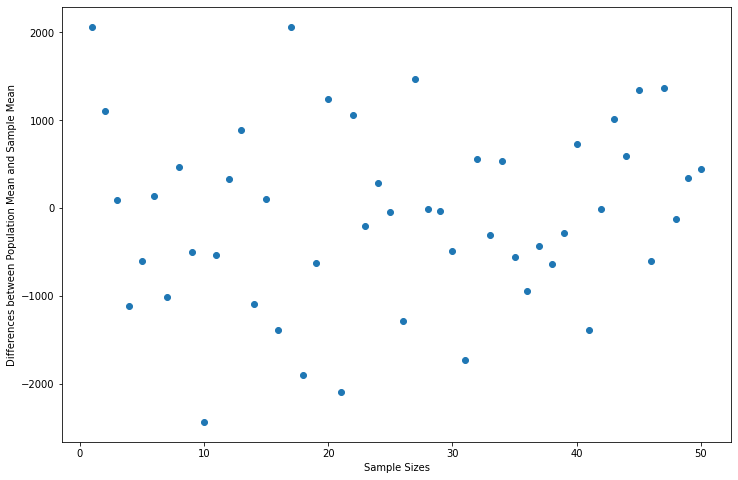

In [45]:
# 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough
Mean_Diff(sample_sizes, y)
plt.xlabel("Sample Sizes")
plt.ylabel("Differences between Population Mean and Sample Mean")
plt.scatter(sample_sizes, means_diff) 

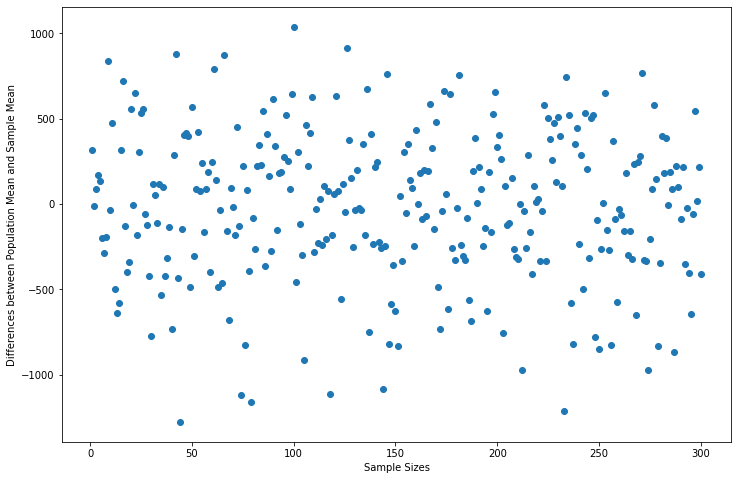

In [47]:
# 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.
means_diff = []
sample_sizes = np.arange(1,301)
Mean_Diff(sample_sizes, y)
plt.xlabel("Sample Sizes")
plt.ylabel("Differences between Population Mean and Sample Mean")
plt.scatter(sample_sizes, means_diff)


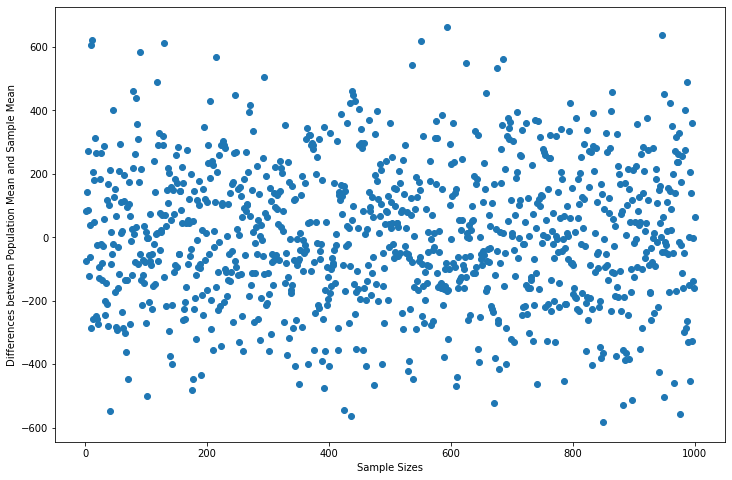

In [48]:
means_diff = []
sample_sizes = np.arange(1, 1001)
Mean_Diff(sample_sizes, y)
plt.xlabel("Sample Sizes")
plt.ylabel("Differences between Population Mean and Sample Mean")
plt.scatter(sample_sizes, means_diff)

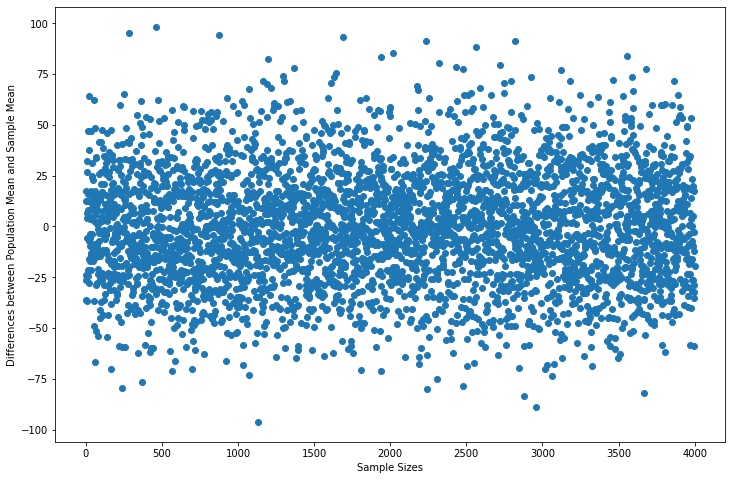

In [49]:
means_diff = []
sample_sizes = np.arange(1, 4001)
Mean_Diff(sample_sizes, y)
plt.xlabel("Sample Sizes")
plt.ylabel("Differences between Population Mean and Sample Mean")
plt.scatter(sample_sizes, means_diff)


### **Observation**
The larger the samples are the more concentrated are the differences within a certain range.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=27901319-aedf-4b36-ba0a-e19011edaf93' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>